# Pretrage grafova

1. Pohlepna pretraga

In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

## Zadatak 1

Proširiti graf sa prethodnih vežbi tako da za grane uvede dodati atribut koji predstavlja udaljenost između povezanih gradova.

{('Beograd', 'Novi Sad'): Text(0.22669065526178941, -0.3799572523008595, '93'),
 ('Beograd', 'Nis'): Text(0.10691804932751137, -0.1571664993354096, '237'),
 ('Beograd',
  'Subotica'): Text(0.16621375267233707, -0.5784395231561924, '190'),
 ('Beograd',
  'Valjevo'): Text(-0.16294269266708059, -0.17805762457366117, '102'),
 ('Novi Sad', 'Beograd'): Text(0.22669065526178941, -0.3799572523008595, '93'),
 ('Novi Sad',
  'Subotica'): Text(0.3609082479298553, -0.5914276426465509, '105'),
 ('Novi Sad', 'Nis'): Text(0.3016125445850296, -0.1701546188257681, '326'),
 ('Subotica',
  'Beograd'): Text(0.16621375267233707, -0.5784395231561924, '190'),
 ('Subotica',
  'Novi Sad'): Text(0.3609082479298553, -0.5914276426465509, '105'),
 ('Nis', 'Beograd'): Text(0.10691804932751137, -0.1571664993354096, '237'),
 ('Nis', 'Novi Sad'): Text(0.3016125445850296, -0.1701546188257681, '326'),
 ('Nis', 'Leskovac'): Text(-0.01140068488851241, 0.2694852672202125, '44'),
 ('Valjevo',
  'Beograd'): Text(-0.162942692

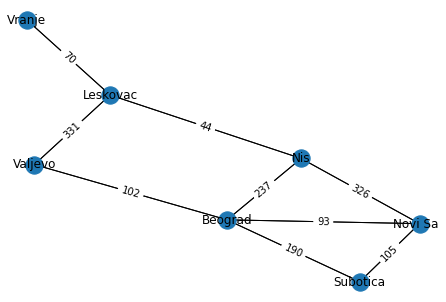

In [2]:
graf = {
    "Beograd": {"Novi Sad": {"udaljenost": 93}, "Nis": {"udaljenost": 237}, "Subotica": {"udaljenost": 190}, "Valjevo": {"udaljenost": 102}},
    "Novi Sad": {"Beograd": {"udaljenost": 93}, "Subotica": {"udaljenost": 105}, "Nis": {"udaljenost": 326}},
    "Subotica": {"Beograd": {"udaljenost": 190}, "Novi Sad": {"udaljenost": 105}},
    "Nis": {"Beograd": {"udaljenost": 237}, "Novi Sad": {"udaljenost": 326}, "Leskovac": {"udaljenost": 44}},
    "Valjevo": {"Beograd": {"udaljenost": 102}, "Leskovac": {"udaljenost": 331}},
    "Leskovac": {"Valjevo": {"udaljenost": 331}, "Nis": {"udaljenost": 44}, "Vranje": {"udaljenost": 70}},
    "Vranje": {"Leskovac": {"udaljenost": 70}}
}

# graf = {
#     "Beograd": {"Novi Sad": {"udaljenost": 1}, "Nis": {"udaljenost": 1}, "Subotica": {"udaljenost": 1}, "Valjevo": {"udaljenost": 1}},
#     "Novi Sad": {"Beograd": {"udaljenost": 1}, "Subotica": {"udaljenost": 1}, "Nis": {"udaljenost": 1}},
#     "Subotica": {"Beograd": {"udaljenost": 1}, "Novi Sad": {"udaljenost": 1}},
#     "Nis": {"Beograd": {"udaljenost": 1}, "Novi Sad": {"udaljenost": 1}, "Leskovac": {"udaljenost": 1}},
#     "Valjevo": {"Beograd": {"udaljenost": 1}, "Leskovac": {"udaljenost": 1}},
#     "Leskovac": {"Valjevo": {"udaljenost": 1}, "Nis": {"udaljenost": 1}, "Vranje": {"udaljenost": 1}},
#     "Vranje": {"Leskovac": {"udaljenost": 1}}
# }


nx_graf = nx.from_dict_of_dicts(graf, create_using=nx.DiGraph)
layout = nx.spring_layout(nx_graf)
labele_udaljenost = nx.get_edge_attributes(nx_graf, "udaljenost")
nx.draw(nx_graf, pos = layout, with_labels = True, arrows = False)
nx.draw_networkx_edge_labels(nx_graf, layout, edge_labels = labele_udaljenost)

## Zadatak 2

Napisati pohlepnu pretragu koja u obzir uzima samo udaljenost gradova.

[[None, 'Beograd'], ['Beograd', 'Novi Sad'], ['Novi Sad', 'Subotica']]


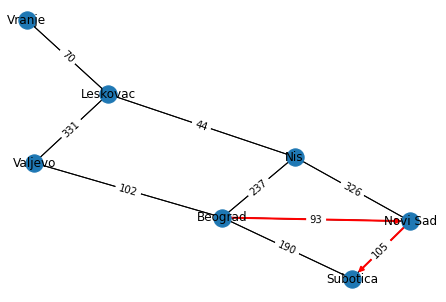

In [3]:
def rekonstruisi_putanju(istorija, zavrsni_cvor):
    trenutni = None
    for i in istorija:
        if i[1] == zavrsni_cvor:
            trenutni = i
    putanja = [trenutni]
    while trenutni[0] is not None:
        for i in reversed(istorija):
            if i[1] == trenutni[0]:
                trenutni = i
                putanja.insert(0, i)
    return putanja

def pohlepna_pretraga(graf, pocetni_cvor, ciljni_cvor):
    za_pretragu = [pocetni_cvor]
    poseceni = set(za_pretragu)
    istorija = [[None, pocetni_cvor]]
    while len(za_pretragu):
        trenutni = za_pretragu.pop()
        poseceni.add(trenutni)
        if trenutni == ciljni_cvor:
            return rekonstruisi_putanju(istorija, ciljni_cvor)
        for cvor, _ in sorted(graf[trenutni].items(), key = lambda i: i[1]["udaljenost"], reverse=True):    
            if cvor not in poseceni:
                za_pretragu.append(cvor)
                istorija.append([trenutni, cvor])
    return None

rezultat = pohlepna_pretraga(graf, "Beograd", "Subotica")
print(rezultat)
labele_udaljenost = nx.get_edge_attributes(nx_graf, "udaljenost")
nx.draw(nx_graf, pos = layout, with_labels = True, arrows = False)
nx.draw_networkx_edge_labels(nx_graf, layout, edge_labels = labele_udaljenost)
nx.draw_networkx_edges(nx_graf, edgelist=rezultat[1:], pos=layout, edge_color='r', width=2)

## Zadatak 3

Pojednostaviti algoritam za crtanje putanje.

[['Beograd', 'Novi Sad'], ['Novi Sad', 'Subotica']]


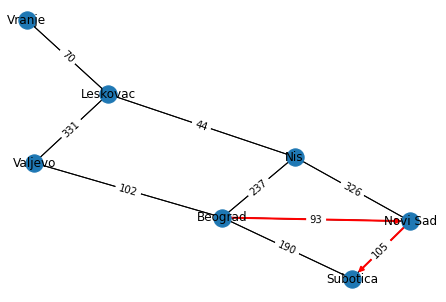

In [4]:
class Poseta:
    def __init__(self, naziv, prethodni=None, udaljenost=1):
        self.naziv = naziv
        self.prethodni = prethodni
        self.udaljenost = udaljenost
    
    def __repr__(self):
        return "{} {}".format(self.naziv, self.udaljenost)

def rekonstruisi_putanju(poseta):
    putanja = []
    while(poseta.prethodni is not None):
        putanja.insert(0, [poseta.prethodni.naziv, poseta.naziv])
        poseta = poseta.prethodni
    return putanja

def pohlepna_pretraga(graf, pocetni_cvor, ciljni_cvor):
    za_pretragu = [Poseta(pocetni_cvor)]
    poseceni = set(za_pretragu)
    while len(za_pretragu):
        trenutni = za_pretragu.pop()
        poseceni.add(trenutni.naziv)
        if trenutni.naziv == ciljni_cvor:
            return rekonstruisi_putanju(trenutni)
        for cvor, _ in sorted(graf[trenutni.naziv].items(), key = lambda i: i[1]["udaljenost"], reverse=True):    
            if cvor not in poseceni:
                za_pretragu.append(Poseta(cvor, trenutni))
    return None

rezultat = pohlepna_pretraga(graf, "Beograd", "Subotica")
print(rezultat)
labele_udaljenost = nx.get_edge_attributes(nx_graf, "udaljenost")
nx.draw(nx_graf, pos = layout, with_labels = True, arrows = False)
nx.draw_networkx_edge_labels(nx_graf, layout, edge_labels = labele_udaljenost)
nx.draw_networkx_edges(nx_graf, edgelist=rezultat, pos=layout, edge_color='r', width=2)

## Zadatak 3

Implementirati uniform cost pretragu.

[['Beograd', 'Nis'], ['Nis', 'Leskovac'], ['Leskovac', 'Vranje']]


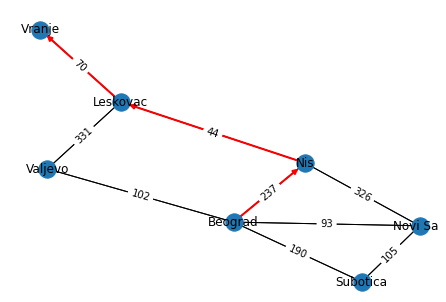

In [5]:
def dijkstra_pretraga(graf, pocetni_cvor, ciljni_cvor):
    za_pretragu = [Poseta(pocetni_cvor)]
    poseceni = set(za_pretragu)
    while len(za_pretragu):
        za_pretragu = sorted(za_pretragu, key=lambda x: x.udaljenost, reverse=True)
        trenutni = za_pretragu.pop()
        poseceni.add(trenutni.naziv)
        if trenutni.naziv == ciljni_cvor:
            return rekonstruisi_putanju(trenutni)
        for cvor, podaci in graf[trenutni.naziv].items():
            cvor = Poseta(cvor, trenutni, podaci["udaljenost"] + trenutni.udaljenost)
            if cvor not in poseceni:
                za_pretragu.append(cvor)
    return None

rezultat = dijkstra_pretraga(graf, "Beograd", "Vranje")
print(rezultat)
labele_udaljenost = nx.get_edge_attributes(nx_graf, "udaljenost")
nx.draw(nx_graf, pos = layout, with_labels = True, arrows = False)
nx.draw_networkx_edge_labels(nx_graf, layout, edge_labels = labele_udaljenost)
nx.draw_networkx_edges(nx_graf, edgelist=rezultat, pos=layout, edge_color='r', width=2)

## Zadatak 4

Implementirati A* pretragu.

[['Beograd', 'Nis'], ['Nis', 'Leskovac'], ['Leskovac', 'Vranje']]


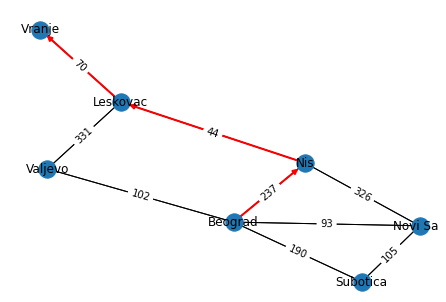

In [6]:
def h(cvor, cilj, pozicije):
    d = np.sqrt((pozicije[cvor][0]-pozicije[cilj][0])**2 + (pozicije[cvor][1]-pozicije[cilj][1])**2)
    return d

def a_zvezda_pretraga(graf, pocetni_cvor, ciljni_cvor):
    za_pretragu = [Poseta(pocetni_cvor)]
    poseceni = set(za_pretragu)
    while len(za_pretragu):
        za_pretragu = sorted(za_pretragu, key=lambda x: x.udaljenost, reverse=True)
        trenutni = za_pretragu.pop()
        poseceni.add(trenutni.naziv)
        if trenutni.naziv == ciljni_cvor:
            return rekonstruisi_putanju(trenutni)
        for cvor, podaci in graf[trenutni.naziv].items():
            cvor = Poseta(cvor, trenutni, podaci["udaljenost"] + trenutni.udaljenost + h(cvor, ciljni_cvor, layout))
            if cvor not in poseceni:
                za_pretragu.append(cvor)
    return None

rezultat = a_zvezda_pretraga(graf, "Beograd", "Vranje")
print(rezultat)
labele_udaljenost = nx.get_edge_attributes(nx_graf, "udaljenost")
nx.draw(nx_graf, pos = layout, with_labels = True, arrows = False)
nx.draw_networkx_edge_labels(nx_graf, layout, edge_labels = labele_udaljenost)
nx.draw_networkx_edges(nx_graf, edgelist=rezultat, pos=layout, edge_color='r', width=2)